In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Analyzing and Preprocessing Data

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [3]:
train_data = train_data.drop('Loan_ID',axis=1)

In [4]:
train_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Label Encoding

In [5]:
categorical_columns = ['Gender','Education','Married','Property_Area','Self_Employed','Dependents','Education','Loan_Status']
continous_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [6]:
def label_encoder(data,col_name):
    unq_values = data[col_name].unique()
    null_val = data[col_name].isnull().values
    res = []
    for i,(val,null) in enumerate(zip(data[col_name].values,null_val)):
        if null:
            res.append(val)
        else:
            res.append(np.str(np.where(unq_values == val)[0][0]))
    return res

In [7]:
train_copy =train_data.copy()

In [8]:
for col in categorical_columns:
    train_copy[col] = label_encoder(train_copy,col)

In [9]:
train_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,NaN,360.0,1.0,0,0
1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,1
2,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0
3,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0
4,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0


## Handling Null Data

In [10]:
train_copy.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# train_copy['LoanAmount'].fillna(train_copy['LoanAmount'].mean(),inplace=True)
# train_copy['Loan_Amount_Term'].fillna(train_copy['Loan_Amount_Term'].mean(),inplace=True)
# train_copy['Credit_History'].fillna(1.0,inplace=True)

###  Filling Missing values and normalizing continous values

In [12]:

#filling NaN values
imputer = KNNImputer(n_neighbors=5)
conti_data = train_copy[continous_columns]
imputer.fit(conti_data)
conti_data = imputer.transform(conti_data)

#normalizing data
scaler = MinMaxScaler()
scaler.fit(conti_data)
conti_data = scaler.transform(conti_data)
conti_data = pd.DataFrame(conti_data,columns=continous_columns)

for col in continous_columns:
    train_copy[col] = conti_data[col]

In [13]:
train_copy[continous_columns].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [14]:
train_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0.070489,0.000000,0.200868,0.74359,1.0,0,0
1,0,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,1,1
2,0,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,0,0
3,0,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,0,0
4,0,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,0,0


# Apply predicting technique for filling missing values

In [15]:
train_copy.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# temp = train_copy.drop(['Married','Dependents','Self_Employed','Credit_History'],axis=1)
# missng_vals = temp[temp['Gender'].isnull()].drop(['Gender'],axis=1)
# filled_vals = temp[temp['Gender'].notnull()]
# y = filled_vals['Gender']

# nullValue_finder.fit(filled_vals[:-10],y[:-10])
# preds = nullValue_finder.predict(filled_vals[-10:])
# counter = 0
# for real,pred in zip(y[-10:],preds):
#     if real == pred:
#         counter+=1
# print(counter/len(preds))

In [57]:

def find_missing_categorical_value(data,columns):
    '''
    Model: ML algorithm you want to use
    data: Your data
    columns: Columns which have null values
    
    Note: your data shold be Normalized and categorcal columns should be encoded.
    '''
    data['index'] = list(range(len(data)))
    for i,col in enumerate(columns):
        fill_na_model = RandomForestClassifier()
        missng_vals = data[data[col].isnull()].drop(columns[i:],axis=1)
        filled_vals = data[data[col].notnull()].drop(columns[i+1:],axis=1)
        y=filled_vals[col].values
        
#         print(filled_vals.drop([col,'index']).columns,missng_vals.drop('index',axis=1).columns)
        
        fill_na_model.fit(filled_vals.drop([col,'index'],axis=1),y)
        preds = fill_na_model.predict(missng_vals.drop('index',axis=1).values)
        
        for p,ind in zip(preds,missng_vals['index']):
            data.at[ind,col]= p
#         print(data[col].isnull().sum())
    data = data.drop('index',axis=1)
    return data

In [18]:
train_copy['Credit_History'].unique()

array([1. , 0. , 0.8, 0.6, 0.4])

In [19]:
preprocessed_train = find_missing_categorical_value(train_copy,['Gender','Married','Self_Employed','Dependents'])

In [20]:
# preprocessed_train = preprocessed_train.drop('index',axis=1)
preprocessed_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
Xtrans = preprocessed_train.drop('Loan_Status',axis=1)
y = preprocessed_train['Loan_Status']

In [22]:
# for col in categorical_columns[:-1]:
#     count = Xtrans[col].value_counts()
#     Xtrans[col].fillna(np.str(np.where(count.max())[0][0]),inplace=True)

In [23]:
Xtrans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,0.070489,0.000000,0.200868,0.74359,1.0,0
1,0,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,1
2,0,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,0
3,0,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,0
4,0,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,0


## Visualizing Data

In [24]:
Xtrans['Loan_Status'] = y.values

### Gender

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

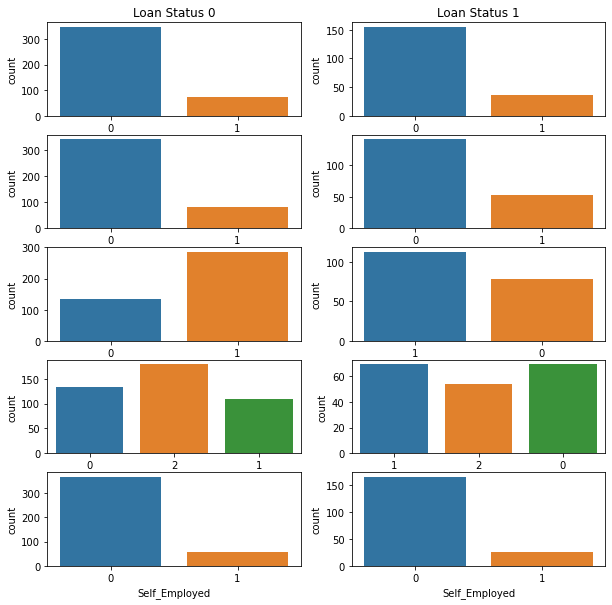

In [25]:
fig,ax = plt.subplots(5,2,figsize=(10,10))


sns.countplot(x='Gender',data=Xtrans[Xtrans['Loan_Status'] == '0'],ax=ax[0][0]).set_title('Loan Status 0')
sns.countplot(x='Gender',data=Xtrans[Xtrans['Loan_Status'] == '1'],ax=ax[0][1]).set_title('Loan Status 1')


sns.countplot(x='Education',data=Xtrans[Xtrans['Loan_Status'] == '0'],ax=ax[1][0])
sns.countplot(x='Education',data=Xtrans[Xtrans['Loan_Status'] == '1'],ax=ax[1][1])


sns.countplot(x='Married',data=Xtrans[Xtrans['Loan_Status'] == '0'],ax=ax[2][0])
sns.countplot(x='Married',data=Xtrans[Xtrans['Loan_Status'] == '1'],ax=ax[2][1])

sns.countplot(x='Property_Area',data=Xtrans[Xtrans['Loan_Status'] == '0'],ax=ax[3][0])
sns.countplot(x='Property_Area',data=Xtrans[Xtrans['Loan_Status'] == '1'],ax=ax[3][1])

sns.countplot(x='Self_Employed',data=Xtrans[Xtrans['Loan_Status'] == '0'],ax=ax[4][0])
sns.countplot(x='Self_Employed',data=Xtrans[Xtrans['Loan_Status'] == '1'],ax=ax[4][1])

#set lables

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

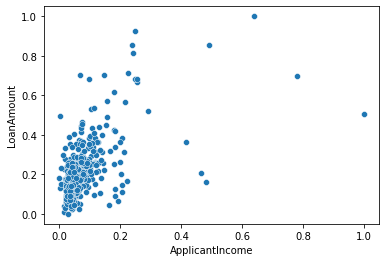

In [26]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=Xtrans)

/home/ms/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

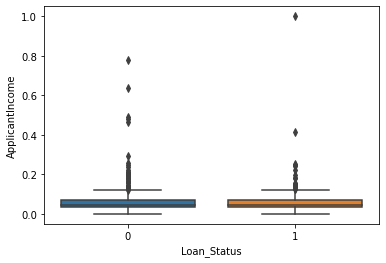

In [27]:
sns.boxplot('Loan_Status','ApplicantIncome',data=Xtrans)

In [28]:
Xtrans = Xtrans.drop('Loan_Status',axis=1)

In [29]:
Xtrans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,0.070489,0.000000,0.200868,0.74359,1.0,0
1,0,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,1
2,0,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,0
3,0,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,0
4,0,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,0


# Training Model

In [58]:

def label_encoder(data,col_name):
    unq_values = data[col_name].unique()
    null_val = data[col_name].isnull().values
    res = []
    for i,(val,null) in enumerate(zip(data[col_name].values,null_val)):
        if null:
            res.append(val)
        else:
            res.append(np.str(np.where(unq_values == val)[0][0]))
    return res

def preprocess_test_data(test_data):
    if 'Loan_ID' in test_data.columns:
        test_data = test_data.drop('Loan_ID',axis=1)

    continous_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
    categorical_columns = ['Gender','Education','Married','Property_Area','Self_Employed','Dependents','Education']

    #handling null values
    #filling NaN values
    imputer = KNNImputer(n_neighbors=5)
    conti_test_data = test_data[continous_columns]
    imputer.fit(conti_data)
    conti_test_data = imputer.transform(conti_test_data)

    #normalizing data
    scaler = MinMaxScaler()
    scaler.fit(conti_test_data)
    conti_test_data = scaler.transform(conti_test_data)
    conti_test_data = pd.DataFrame(conti_test_data,columns=continous_columns)

    for col in continous_columns:
        test_data[col] = conti_test_data[col]
    
    
    null_cols = []
    for col in categorical_columns:
        if test_data[col].isnull().sum() != 0:
            null_cols.append(col)
    
    #for categorical values
    for col in categorical_columns:
        test_data[col] = label_encoder(test_data,col)
   
    Xtrans_test = test_data.copy()
    res_test = find_missing_categorical_value(Xtrans_test,null_cols)
    
    return res_test

In [38]:
test = pd.read_csv('test.csv')

In [39]:
t =preprocess_test_data(test)

In [46]:
test[test['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,LP001128,NaN,No,0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,LP001287,NaN,Yes,3+,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,LP001563,NaN,No,0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,LP001769,NaN,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,LP002165,NaN,No,1,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,LP002298,NaN,No,0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,LP002355,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,LP002553,NaN,No,0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,LP002614,NaN,No,0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,LP002657,NaN,Yes,1,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


In [56]:
t['Gender'][279]

'0'

In [65]:
def train_model(n_est,max_depth):
    model = RandomForestClassifier(n_estimators=n_est,max_depth=max_depth)
    model.fit(Xtrans.values,y.values)
    test_preprocess =preprocess_test_data(test)
    pred = model.predict(test_preprocess)
    submisson = pd.DataFrame()
    pred_cat = []

    for val in pred:
        if val=='0':
            pred_cat.append('Y')
        else:
            pred_cat.append('N')
    submisson['Loan_ID'] = test['Loan_ID'].values
    submisson['Loan_Status'] = pred_cat
    if max_depth is None:
        submisson.to_csv(f'Final_submission_{n_est}_None.csv',index=None)
    else:
        submisson.to_csv(f'Final_submission_{n_est}_{max_depth}.csv',index=None)

In [60]:
from itertools import product

for n_est,max_dpth in product([100,50,80,200,250],[None,4,5,3,6,10]):
    train_model(n_est,max_dpth)

In [70]:
train_model(50,5)